ML project steps
1. Problem Definition
2. Data Analysis
3. Traininng
4. Validation
5. loop back to 3 until happy with model
6. Use model in production

# Libraries and Setup Jargon
Run the following cells to set up the notebook.


In [2]:
# Sklearn and Pandas Setup
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split

In [3]:

# random forest
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# xgboost
from xgboost import XGBClassifier

In [4]:
!apt update

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,009 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,131 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [556 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,398 kB]
Get:1

In [5]:
!apt upgrade

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Calculating upgrade... Done
The following packages have been kept back:
  libcudnn8 libcudnn8-dev libnccl-dev libnccl2
The following packages will be upgraded:
  base-files binutils binutils-common binutils-x86-64-linux-gnu cuda-keyring
  cuda-toolkit-config-common distro-info-data libbinutils libc-bin libcap2 libctf-nobfd0 libctf0
  libldap-2.5-0 libssl-dev libssl3 libudev1 linux-libc-dev openssl
18 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Need to get 11.3 MB of archives.
After this operation, 67.6 kB of additional disk space will be used.
Get:1 http://security.ubuntu.com/ubuntu jammy-security/main amd64 libssl-dev amd64 3.0.2-0ubuntu1.12 [2,373 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  cuda-keyring 1.1-1 [4,332 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  cuda-toolkit-config-common 12.3

# **Part I:** Dirt vs rest Data Preprocessing and Modeling in `scikit-learn`

## **1.1** Data Loading and Preprocessing


In [9]:
path_39 = '/content/Defects_week_39.csv'
path_k = '/content/Defect Key.csv'
df_39 = pd.read_csv(path_39)
df_dk = pd.read_csv(path_k)

In [ ]:
df_39

In [ ]:
df_dk

In [10]:
dict = {"B640": "Passenger side nose", "B632": "Pass. side front door (top ext)", "B654": "Right recharge lid (ext)",
        "B616": "Right Bottom Quadrant roof", "B628": "Driver tail end", "B661": "Bottom driver's b-pillar", "B615": "Right Top Quadrant roof",
        "B657": "Rear driver door opening  (int)", "B641": "Passenger side tail", "B627": "Driver side C pillar", "B618": "(Top) Right Side Lid (ext)",
        "B636": "Pass. side rear door (top ext)", "B638": "Pass. side rear door (bottom ext)", "B620": "(Top) Left Side Lid (int)",
        "B614": "Left Bottom Quadrant roof", "B658": "Front passenger door opening  (int)", "B613": "Left Top Quadrant roof",
        "B662": "Top passenger b-pillar", "B621": "Driver side nose", "B612": "Left Side hood (int)", "B707": "Right mid roof",
        "B660": "Top driver's b-pillar", "B659": "Rear passenger door opening  (int)", "B623": "Driver side door (top;ext)",
        "B629": "Driver side rear door (top ext)", "B644": "Rear passenger side trunk (ext)", "B691": "Left rear side", "B692": "Right rear side",
        "B655": "Front door opening -frame (int)", "B611": "Right Side hood (int)", "B634": "Pass. side front door (bot ext)",
        "B619": "(Top) Right Side Lid (int)", "B610": "Right Side hood (ext)", "B609": "Left Side hood (ext)", "B663": "Bottom passenger b-pillar",
        "B705": "Left mid roof", "B704": "Right Cpillar, A-pillar, mid roof", "B633": "Pass. side front door (top int)", "B714": "Left C pillar",
        "B639": "Pass. side rear door (bottom int)", "B642": "Rear driver side trunk (ext)", "B637": "Pass. side rear door (top int)",
        "B617": "(Top) Left Side Lid (ext)", "B708": "Right A-pillar", "B624": "Driver side door (bottom;ext)", "B706": "Left A pillar",
        "B631": "Driver side rear door (bottom ext)", "B700": "Right side top lid", "B699": "Left side top lid", "B695": "Driver side rear door (top int)",
        "B759": "V536 RIGHT SIDE HOOD", "B747": "V536 LEFT FRONT DOOR PANEL", "B778": "V536 LEFT NOSE", "B748": "V536 LEFT REAR DOOR PANEL",
        "B741": "V536 RIGHT FRONT DOOR THRESHOLD", "B728": "V536 RIGHT B PILLAR INTERIOR TOP", "B742": "V536 RIGHT REAR DOOR THRESHOLD",
        "B757": "V536 RIGHT REAR TRUNK PANEL", "B783": "Tail Gate", "B746": "V536 RIGHT REAR QUARTER PANEL", "B743": "V536 LEFT REAR DOOR THRESHOLD",
        "B753": "V536 RIGHT FRONT DOOR PANEL", "B731": "V536 LEFT B PILLAR INTERIOR TOP", "B754": "V536 RIGHT REAR DOOR PANEL",
        "B758": "V536 RIGHT REAR TRUNK WINDOW PANEL", "B653": "Right recharge lid (int)", "B755": "V536 RIGHT FRONT DOOR WINDOW PANEL",
        "B750": "V536 LEFT REAR DOOR WINDOW PANEL", "B751": "V536 LEFT REAR TRUNK WINDOW PANEL", "B779": "V536 RIGHT NOSE"}

In [11]:
df_39['Fault Area Code'] = df_39['Fault Area Code'].str[0:4].map(dict)

In [ ]:
df_39

## **1.2** EDA

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In [12]:
df_combine = df_39.merge(df_dk, how='left', left_on= 'Fault Area Code', right_on = 'ATACQ',copy=False)

In [ ]:
df_combine.info()

In [13]:
df_combine.drop(columns=['Link Timestamp', 'Unnamed: 13', 'Unnamed: 0','ATACQ Item ID', 'Rfid', 'ATACQ', 'ALL', 'VLOOKUP(M2,$B$3:$F$103,2,0)'], inplace=True)

In [14]:
df_combine = df_combine.dropna()

## **1.3** Feature Engineering

Feature engineering is the process of applying domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms.

### **1.3.2** One Hot Encoding
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. With one-hot encoding, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns.

One way to one-hot encode in Pandas is by using `pd.get_dummies()` . The documentation can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

In [15]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81649 entries, 0 to 85626
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Topcoat Color            81649 non-null  int64 
 1   Primer Color             81649 non-null  int64 
 2   Clearcoat Color          81649 non-null  object
 3   ATACQ Item English Desc  81649 non-null  object
 4   Fault Area Code          81649 non-null  object
 5   Graphical Code Loc Desc  81649 non-null  object
 6   Int-ext                  81649 non-null  object
 7   D/L - P/R                81649 non-null  object
 8   L/R                      81649 non-null  object
 9   H-V                      81649 non-null  object
 10  Panel                    81649 non-null  object
 11  Primer                   81649 non-null  object
 12  BC Int                   81649 non-null  object
 13  BC Ext 1                 81649 non-null  object
 14  BC Ext 2                 81649 non-nul

In [16]:
df_combine_copy = df_combine.copy()

In [17]:
df_combine_copy = pd.get_dummies(df_combine_copy, columns=['H-V', 'Int-ext', 'L/R', 'D/L - P/R','Primer', 'BC Int', 'BC Ext 1', 'BC Ext 2', 'CC Int','CC Ext', 'Topcoat Color', 'Primer Color', 'Clearcoat Color'])

In [18]:
df_combine_copy

,ATACQ Item English Desc,Fault Area Code,Graphical Code Loc Desc,Panel,H-V_H,H-V_V,Int-ext_ext,Int-ext_int,L/R_L,L/R_R,...,Topcoat Color_731,Topcoat Color_735,Topcoat Color_736,Topcoat Color_740,Primer Color_0,Primer Color_915,Primer Color_928,Primer Color_929,Clearcoat Color_,Clearcoat Color_002
0,DIRT (TOPCOAT),Front door opening -frame (int),DIRT,L1 Door Int,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,1
1,DIRT (TOPCOAT),Front door opening -frame (int),DIRT,L1 Door Int,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,1
2,EC BOIL OUT,Front passenger door opening (int),EC BOIL OUT,L1 Door Int,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
3,EC BOIL OUT,Front passenger door opening (int),EC BOIL OUT,L1 Door Int,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
4,DIRT (TOPCOAT),Passenger side nose,DIRT,RFF,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85622,DIRT (TOPCOAT),Driver side nose,DIRT,LFF,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
85623,DIRT (PRIMER INSPECTION),Driver tail end,DIRT,LQTR,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
85624,DIRT (PRIMER INSPECTION),Driver tail end,DIRT,LQTR,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
85625,DIRT (PRIMER INSPECTION),Pass. side front door (top ext),DIRT,R1 Door,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [19]:
df_combine_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81649 entries, 0 to 85626
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ATACQ Item English Desc  81649 non-null  object
 1   Fault Area Code          81649 non-null  object
 2   Graphical Code Loc Desc  81649 non-null  object
 3   Panel                    81649 non-null  object
 4   H-V_H                    81649 non-null  uint8 
 5   H-V_V                    81649 non-null  uint8 
 6   Int-ext_ext              81649 non-null  uint8 
 7   Int-ext_int              81649 non-null  uint8 
 8   L/R_L                    81649 non-null  uint8 
 9   L/R_R                    81649 non-null  uint8 
 10  D/L - P/R_D              81649 non-null  uint8 
 11  D/L - P/R_L              81649 non-null  uint8 
 12  D/L - P/R_P              81649 non-null  uint8 
 13  Primer_R11               81649 non-null  uint8 
 14  Primer_R12               81649 non-nul

### **1.3.3** Preprocessing: Split into Features and Label

Now that we have explored and cleaned our dataset, let's prepare it for a machine learning task.

The features will be the encoded variables you've created so for from 1.3.1 - 1.3.2. The label will be the `Graphical Code Loc Desc`, indicating the price. Store these two as `features` and `Defects`, respectively.

In [20]:
featureslist = list(df_combine_copy.columns)

In [21]:
featureslist.remove('ATACQ Item English Desc')
featureslist.remove('Fault Area Code')
featureslist.remove('Panel')
featureslist.remove('Graphical Code Loc Desc')

In [22]:
featureslist

['H-V_H',
 'H-V_V',
 'Int-ext_ext',
 'Int-ext_int',
 'L/R_L',
 'L/R_R',
 'D/L - P/R_D',
 'D/L - P/R_L',
 'D/L - P/R_P',
 'Primer_R11',
 'Primer_R12',
 'Primer_R21',
 'Primer_R22',
 'Primer_X',
 'BC Int_R11',
 'BC Int_R12',
 'BC Int_R21',
 'BC Int_R22',
 'BC Int_X',
 'BC Ext 1_R11',
 'BC Ext 1_R12',
 'BC Ext 1_R21',
 'BC Ext 1_R22',
 'BC Ext 1_X',
 'BC Ext 2_R13',
 'BC Ext 2_R14',
 'BC Ext 2_R23',
 'BC Ext 2_R24',
 'BC Ext 2_X',
 'CC Int_R11',
 'CC Int_R12',
 'CC Int_R21',
 'CC Int_R22',
 'CC Int_X',
 'CC Ext_R11',
 'CC Ext_R12',
 'CC Ext_R21',
 'CC Ext_R22',
 'CC Ext_X',
 'Topcoat Color_0',
 'Topcoat Color_707',
 'Topcoat Color_717',
 'Topcoat Color_723',
 'Topcoat Color_725',
 'Topcoat Color_728',
 'Topcoat Color_731',
 'Topcoat Color_735',
 'Topcoat Color_736',
 'Topcoat Color_740',
 'Primer Color_0',
 'Primer Color_915',
 'Primer Color_928',
 'Primer Color_929',
 'Clearcoat Color_ ',
 'Clearcoat Color_002']

In [23]:
features = df_combine_copy[featureslist]
label = df_combine_copy['Graphical Code Loc Desc'].apply(lambda x: 1 if x == 'DIRT' else 0)

## **1.4** Modeling (sklearn)

### **1.4.1** Split Data into Train and Test

Use scikit-learn's `train_test_split` function to split data for regression into train and test sets. The split should be 80-20 meaning 80% for training and rest for testing.

Since this part concerns regression, you should carefully think about what should be our target variable?

**_IMPORTANT_: Please set the `seed` variable to 42 and then set the parameter to `random_state = seed`** and store the resulting splits as `x_train, x_test, y_train,` and `y_test`. This is necessary in order for our autograder to accurately evaluate your answer.

In [38]:
seed = 42
x_train, x_test, y_train, y_test = train_test_split(features, label, random_state=seed, test_size=0.2)

### **1.4.3** Classification Models
We are now switching into classification mode. We will be predicting whether the defect is `DIRT` or else.
We also need to redefine our features for this new task. Carefully think about which columns should be used as features and which column should be used as label. Store these as `labels` and `features` respectively.

- **Note 1**: Do not include highly correlated features in `features
- **Note 2**: Do not include any column which is directly related to the `labels` in the `features`. Think about why that's a bad idea as this is an extremely important consideration.

#### (a) Logistic Regression

Fit a Logistic regression classifier on the `x_train` and `y_train` with the default hyperparameters. Calculate the accuracy of the model on the test set using the `score` method and store it in a variable named `log_acc`

In [39]:
from sklearn.linear_model import LogisticRegression
# TO-DO: Initialize model with default parameters and fit it on the training set
logreg = LogisticRegression(penalty='l2', class_weight='balanced')
logreg.fit(x_train, y_train)
# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = logreg.predict(x_test)
# TO-DO: Find the accuracy and store the value in `log_acc`
log_acc = logreg.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
log_acc

0.6120024494794856

In [41]:
sorted_copy = sorted(logreg.coef_[0])
top12 = sorted_copy[0:6] + sorted_copy[40:46]
print(top12)
top10_index = []
for i in range(logreg.coef_.size):
  if logreg.coef_[0][i] in top12:
    top10_index.append(i)

print(top10_index)


[-1.5919531348751845, -1.1347957164181393, -1.007718376779296, -1.0073335814235629, -0.9855970108027654, -0.9385682313553446, 0.2016946976860343, 0.2172800757171643, 0.24302355666575567, 0.2623144840693, 0.27357144693085367, 0.31060049583768656]
[11, 15, 16, 20, 22, 33, 34, 41, 43, 48, 49, 51]


In [42]:
top10_features = []
for i in range(12):
  top10_features.append(list(x_test.columns)[top10_index[i]])


top10_features

['Primer_R21',
 'BC Int_R12',
 'BC Int_R21',
 'BC Ext 1_R12',
 'BC Ext 1_R22',
 'CC Int_X',
 'CC Ext_R11',
 'Topcoat Color_717',
 'Topcoat Color_725',
 'Topcoat Color_740',
 'Primer Color_0',
 'Primer Color_928']

#### (b) PCA to Reduce Dimensionality

The goal of Principal Component Analysis is to reduce the number of dimensions of our features.

In [43]:
# TO-DO: Impprt libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# TO-DO: Intermediate step to address scale-invariance
scaler = StandardScaler()

scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
pca = PCA(n_components=scaled_x_train.shape[1])
pca_x_train = pca.fit_transform(scaled_x_train)

In [44]:
explained_variance_ratios = pca.explained_variance_ratio_

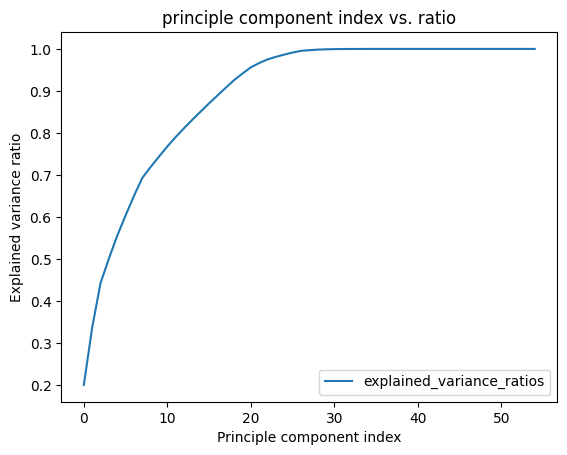

In [45]:
plt.plot(np.arange(0, 55), np.cumsum(explained_variance_ratios), label='explained_variance_ratios')
plt.legend()
# Plot (1 point for correct shape)
plt.xlabel('Principle component index')
plt.ylabel('Explained variance ratio')
plt.title('principle component index vs. ratio')
# Aesthetics (1 point for title AND both axes labels)
plt.show()

In [46]:
#TO-DO: Get transformed set of principal components on x_test

# 1. Refit and transform on training with parameter n (as deduced from the last step)
pca = PCA(n_components=20)

pca_x_train = pca.fit_transform(x_train)

# 2. Transform on Testing Set and store it as `x_test_pca`
x_test_pca = pca.transform(x_test)

In [47]:
# TO-DO: Initialize `log_reg_pca` model with default parameters and fit it on the PCA transformed training set
log_reg_pca = LogisticRegression()
log_reg_pca.fit(pca_x_train, y_train)


# TO-DO: Use the model to predict on the PCA transformed test set and save these predictions as `y_pred`
y_pred = log_reg_pca.predict(x_test_pca)

# TO-DO: Find the accuracy and store the value in `test_accuracy`
test_accuracy = log_reg_pca.score(x_test_pca, y_test)

In [48]:
test_accuracy

0.7268830373545622

### Confusion Matrix

A confusion matrix is a table that is used to define the performance of a classification algorithm.

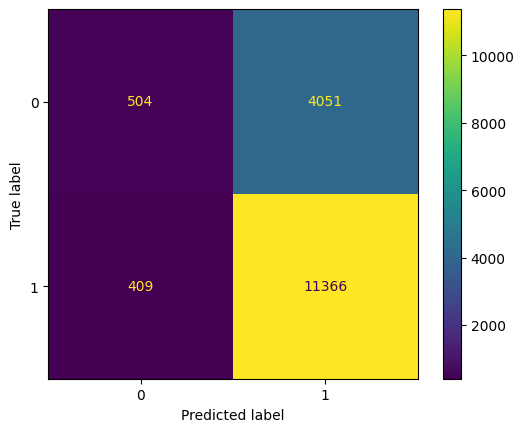

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

## Decision Tree

Accuracy on test_set:0.662


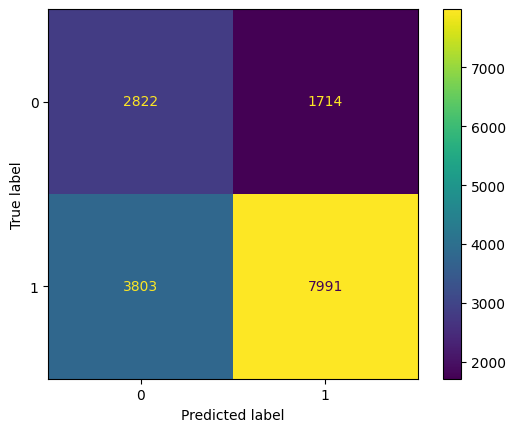

In [26]:
x_tree = df_combine_copy[featureslist]
y_tree = df_combine_copy['Graphical Code Loc Desc'].apply(lambda x: 1 if x == 'DIRT' else 0)

x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x_tree, y_tree, test_size=0.2)

# create a classifier object
tree_model = DecisionTreeClassifier(class_weight='balanced')

# fit the classifer with x and y data
tree_model.fit(x_train_tree, y_train_tree)

accuracy = tree_model.score(x_test_tree, y_test_tree)
print(f"Accuracy on test_set:{accuracy:.3f}")

# Confusion matrix
predictions = tree_model.predict(x_test_tree)

cm3 = confusion_matrix(y_test_tree, predictions)

ConfusionMatrixDisplay(cm3).plot()


## Random Forest

Accuracy on test_set:0.658


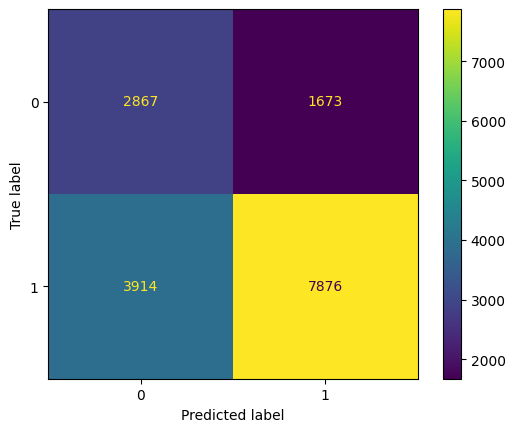

In [30]:
x_tree = df_combine_copy[featureslist]
y_tree = df_combine_copy['Graphical Code Loc Desc'].apply(lambda x: 1 if x == 'DIRT' else 0)


x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x_tree, y_tree, test_size=0.2)

# create a classifier object
forest_model = RandomForestClassifier(class_weight='balanced')

# fit the classifer with x and y data
forest_model.fit(x_train_tree, y_train_tree)

accuracy = forest_model.score(x_test_tree, y_test_tree)
print(f"Accuracy on test_set:{accuracy:.3f}")

# Confusion matrix
predictions = forest_model.predict(x_test_tree)

cm4 = confusion_matrix(y_test_tree, predictions)

ConfusionMatrixDisplay(cm4).plot()

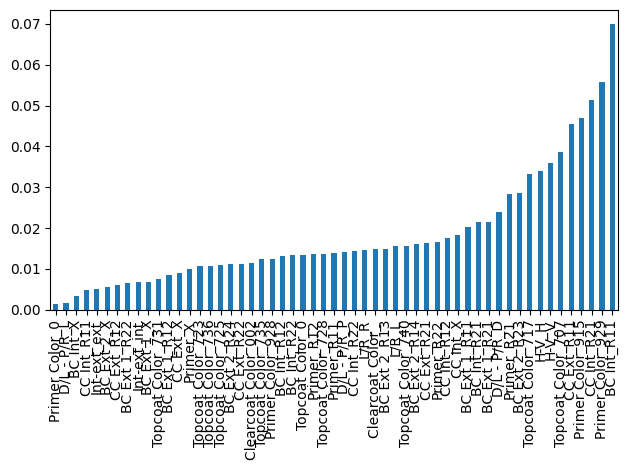

In [34]:
importances = forest_model.feature_importances_
forest_importances = pd.Series(importances, index=featureslist).sort_values()
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
fig.tight_layout()

## XGBoost

Accuracy on test_set:0.747


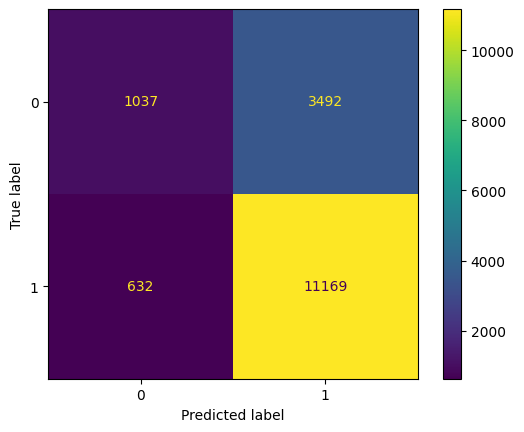

In [28]:
# XGBoost doesn't like [] in the feature names so we need to change the names of our columns
x_boost = df_combine_copy[featureslist]
y_boost = df_combine_copy['Graphical Code Loc Desc'].apply(lambda x: 1 if x == 'DIRT' else 0)

x_train_boost, x_test_boost, y_train_boost, y_test_boost = train_test_split(x_boost, y_boost, test_size=0.2)

boost = XGBClassifier()
boost.fit(x_train_boost, y_train_boost)

accuracy = boost.score(x_test_boost, y_test_boost)
print(f"Accuracy on test_set:{accuracy:.3f}")

# Confusion matrix
predictions = boost.predict(x_test_boost)

cm5 = confusion_matrix(y_test_boost, predictions)

ConfusionMatrixDisplay(cm5).plot()


<Axes: >

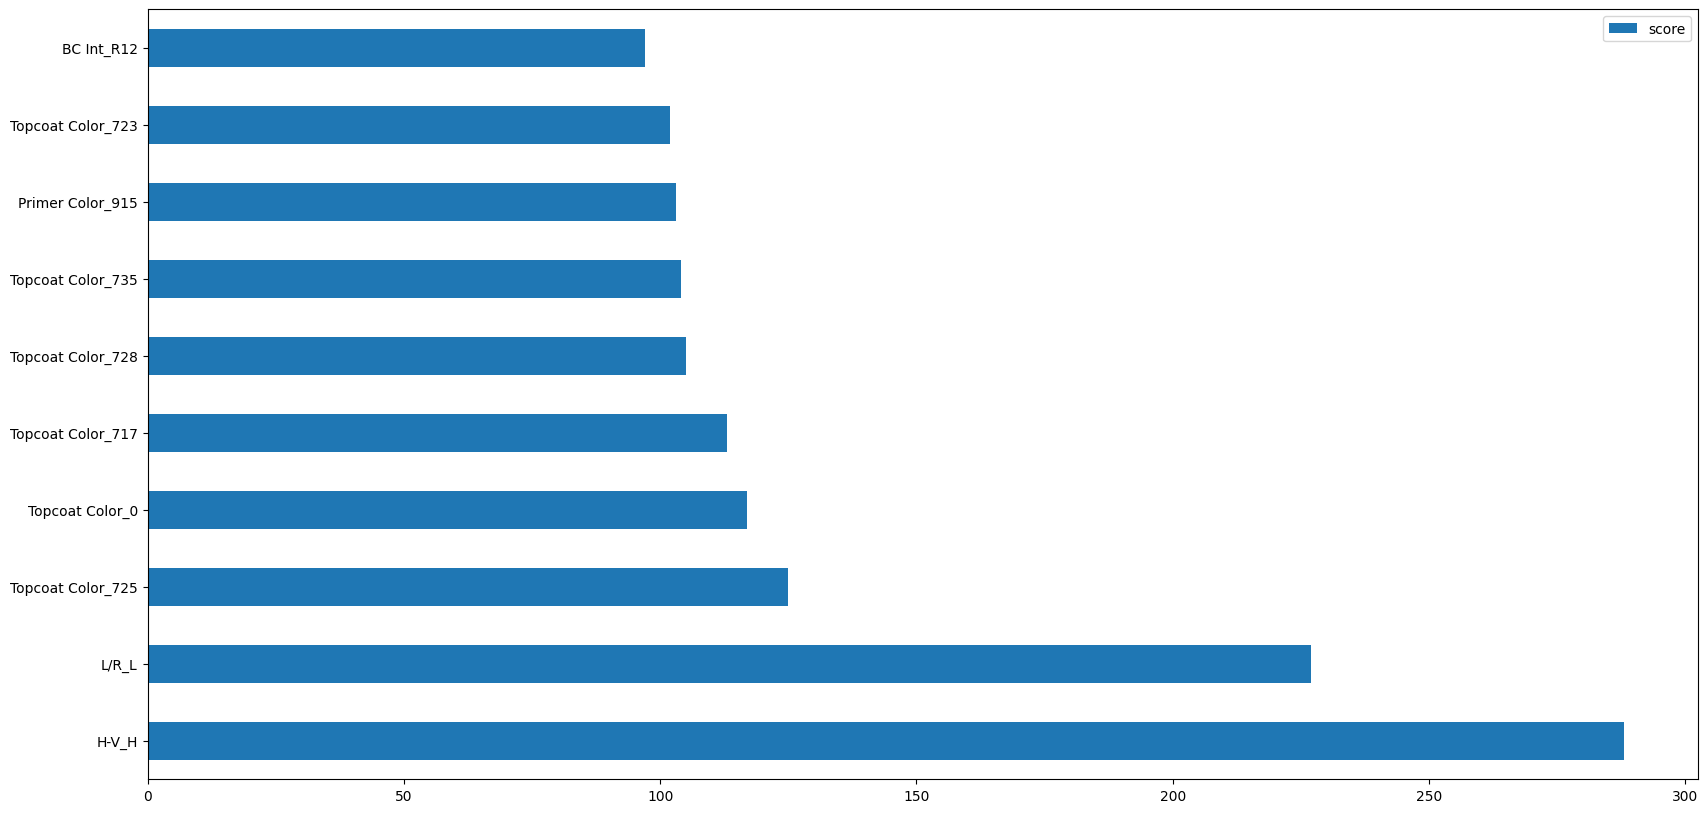

In [29]:
feature_important = boost.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 10 features